In [ ]:
Importing Nessesary Libraries

# Importing Library and Dataset



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import os
import cv2
from scipy.fftpack import dct, idct

Importing Dataset and Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

#load images from a folder
def load_images_from_folder(folder, label, img_size=(128, 128)):
    images = []
    labels = []
    for image_name in os.listdir(folder):
        image_path = os.path.join(folder, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        if image is not None:
            image = cv2.resize(image, img_size)  # Resize image to 128x128
            images.append(image)
            labels.append(label)
    return images, labels

# Define path
adenocarcinoma_folder = r"F:\Code Practice\pythonBasics\lungcancerdataset\adenocarcinoma"
benign_folder = r"F:\Code Practice\pythonBasics\lungcancerdataset\benign"

# Load images and labels
adenocarcinoma_images, adenocarcinoma_labels = load_images_from_folder(adenocarcinoma_folder, label=1)  # Label 1 for adenocarcinoma
benign_images, benign_labels = load_images_from_folder(benign_folder, label=0)  # Label 0 for benign

# Combine images and labels
images = np.array(adenocarcinoma_images + benign_images)
labels = np.array(adenocarcinoma_labels + benign_labels)

# Normalize  images (scale pixel values to [0, 1])
images = images / 255.0

# Reshape images for CNN
images = images.reshape((-1, 128, 128, 1))

# Split  dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)


Printing Shape of Dataset

In [ ]:
print(f"Training images shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing images shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Testing set class distribution: {np.bincount(y_test)}")

Training images shape: (8000, 128, 128, 1)
Training labels shape: (8000,)
Testing images shape: (2000, 128, 128, 1)
Testing labels shape: (2000,)
Training set class distribution: [4000 4000]
Testing set class distribution: [1000 1000]




# Building CNN Model

Building CNN Model

In [ ]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to the training data
datagen.fit(X_train)

# CNN model with Dropout and L2 Regularization
def create_cnn_model(input_shape):
    model = models.Sequential([
        # First layer
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape,
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),  # Dropout after first cn layer

        # 2nd layer
        layers.Conv2D(64, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),  # Dropout after second layer

        # Third layer
        layers.Conv2D(128, (3, 3), activation='relu',
                      kernel_regularizer=regularizers.l2(0.001)),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),  # Dropout after third  layer

        # Flatten the output
        layers.Flatten(),

        # Fully connected layer
        layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),  # Dropout after the fully connected layer

        # Output layer
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model
# input shape
input_shape = (128, 128, 1)
# CNN model
cnn_model = create_cnn_model(input_shape)
# Compile model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model summary
cnn_model.summary()


C:\Users\Rahat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

# Performing K Fold Validation

Performing K Fold Cross Validation For CNN: 5 Fold

Fold 1/5


C:\Users\Rahat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 60s 287ms/step - accuracy: 0.5071 - loss: 0.9684 - val_accuracy: 0.4988 - val_loss: 0.7558
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 58s 288ms/step - accuracy: 0.5147 - loss: 0.7454 - val_accuracy: 0.5013 - val_loss: 0.7236
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 57s 284ms/step - accuracy: 0.5128 - loss: 0.7182 - val_accuracy: 0.5013 - val_loss: 0.7049
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 57s 285ms/step - accuracy: 0.5562 - loss: 0.6979 - val_accuracy: 0.5013 - val_loss: 0.7604
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 57s 284ms/step - accuracy: 0.7023 - loss: 0.5417 - val_accuracy: 0.7412 - val_loss: 0.5155
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 57s 285ms/step - accuracy: 0.8435 - loss: 0.4223 - val_accuracy: 0.8481 - val_loss: 0.4034
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 57s 283ms/step - accuracy: 0.8499 - loss: 0.4106 - val_accuracy: 0.8350 - val_loss: 0.3880
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 57s 284ms/step - accuracy: 0.8542 - loss: 0

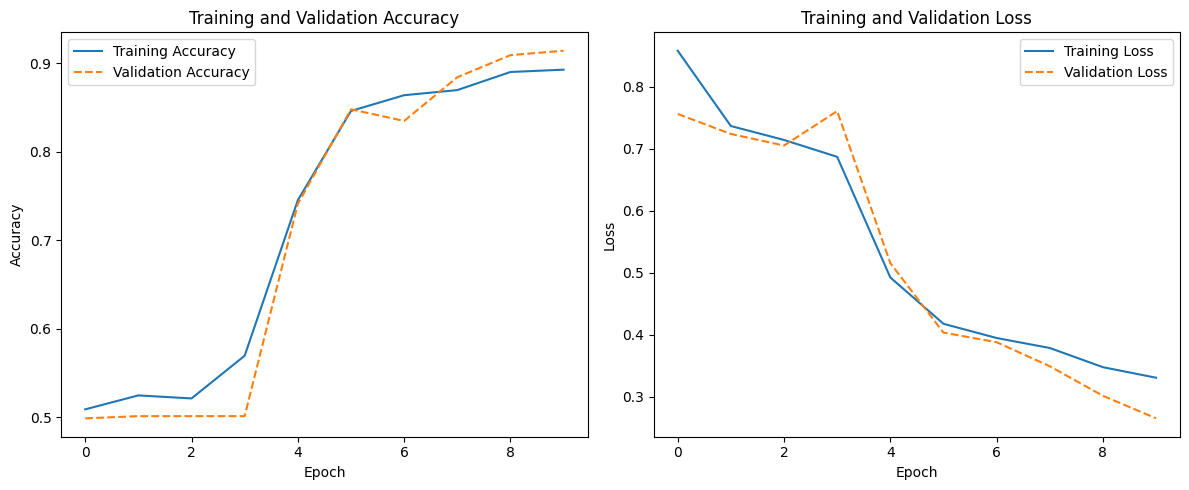

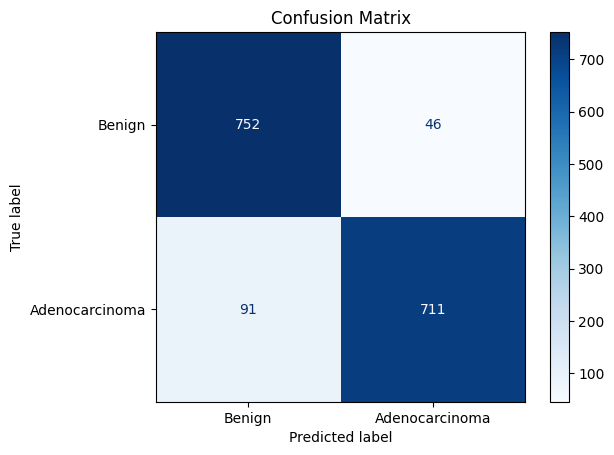

Fold 2/5


C:\Users\Rahat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 58s 282ms/step - accuracy: 0.5240 - loss: 0.9280 - val_accuracy: 0.5319 - val_loss: 0.8003
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 280ms/step - accuracy: 0.8138 - loss: 0.4829 - val_accuracy: 0.8806 - val_loss: 0.3651
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 57s 282ms/step - accuracy: 0.8711 - loss: 0.3645 - val_accuracy: 0.9112 - val_loss: 0.3180
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 280ms/step - accuracy: 0.8762 - loss: 0.3633 - val_accuracy: 0.9025 - val_loss: 0.2886
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 281ms/step - accuracy: 0.8912 - loss: 0.3307 - val_accuracy: 0.9169 - val_loss: 0.2890
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 282ms/step - accuracy: 0.9081 - loss: 0.2878 - val_accuracy: 0.9225 - val_loss: 0.2679
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 280ms/step - accuracy: 0.9087 - loss: 0.2829 - val_accuracy: 0.9044 - val_loss: 0.2870
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 57s 285ms/step - accuracy: 0.9098 - loss: 0

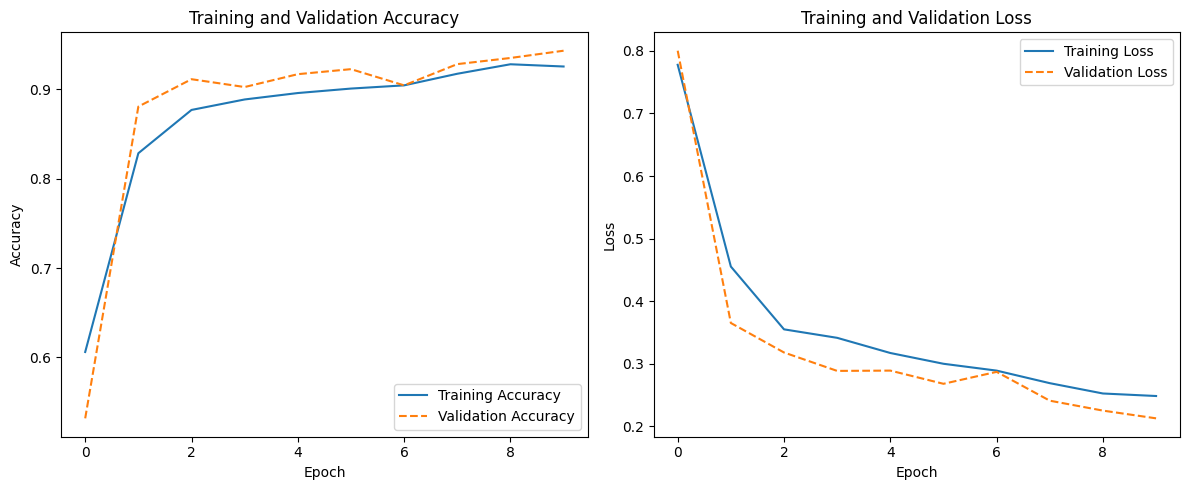

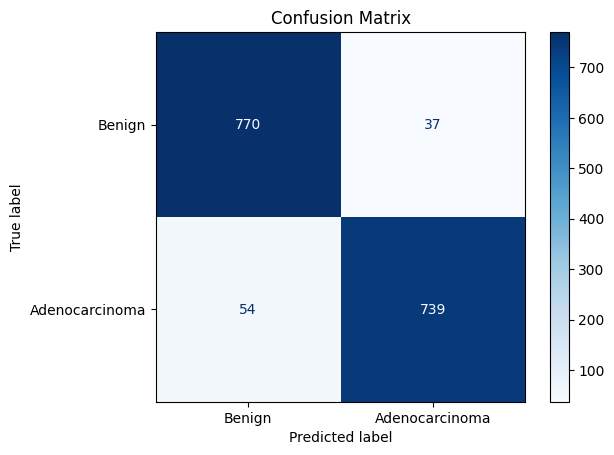

Fold 3/5


C:\Users\Rahat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 58s 279ms/step - accuracy: 0.5279 - loss: 0.9074 - val_accuracy: 0.7094 - val_loss: 0.6067
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 278ms/step - accuracy: 0.7522 - loss: 0.5632 - val_accuracy: 0.8419 - val_loss: 0.4512
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 55s 277ms/step - accuracy: 0.8505 - loss: 0.4045 - val_accuracy: 0.9000 - val_loss: 0.3192
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 58s 292ms/step - accuracy: 0.8845 - loss: 0.3466 - val_accuracy: 0.8600 - val_loss: 0.4034
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 281ms/step - accuracy: 0.8863 - loss: 0.3412 - val_accuracy: 0.9269 - val_loss: 0.2772
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 57s 286ms/step - accuracy: 0.9111 - loss: 0.2980 - val_accuracy: 0.9294 - val_loss: 0.2556
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 59s 296ms/step - accuracy: 0.9204 - loss: 0.2730 - val_accuracy: 0.8813 - val_loss: 0.3624
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 60s 299ms/step - accuracy: 0.9071 - loss: 0

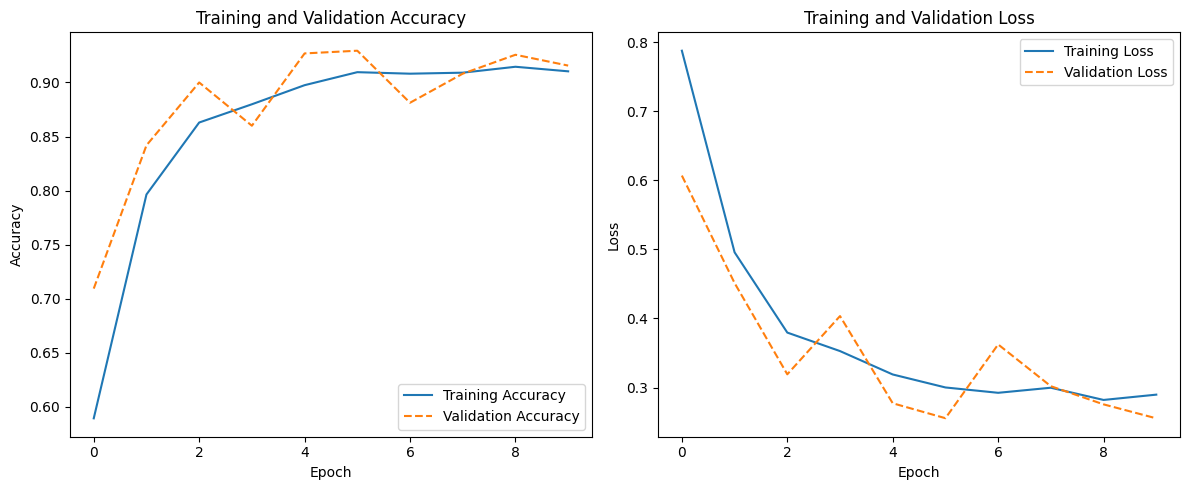

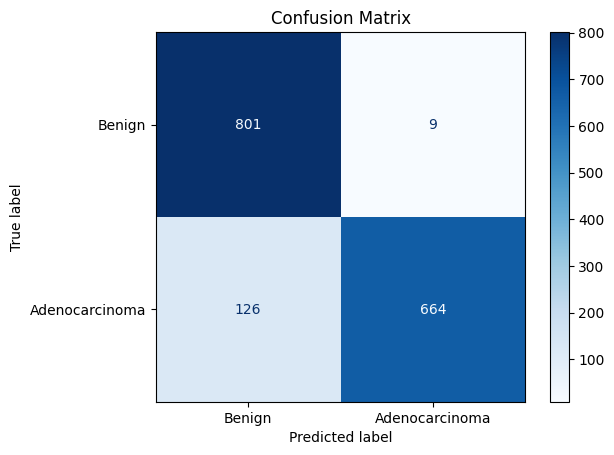

Fold 4/5


C:\Users\Rahat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 58s 279ms/step - accuracy: 0.5137 - loss: 1.0051 - val_accuracy: 0.7356 - val_loss: 0.5751
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 281ms/step - accuracy: 0.8125 - loss: 0.5021 - val_accuracy: 0.6150 - val_loss: 0.6629
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 280ms/step - accuracy: 0.8501 - loss: 0.4263 - val_accuracy: 0.8556 - val_loss: 0.3910
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 57s 285ms/step - accuracy: 0.8762 - loss: 0.3604 - val_accuracy: 0.8406 - val_loss: 0.4174
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 280ms/step - accuracy: 0.8871 - loss: 0.3441 - val_accuracy: 0.9038 - val_loss: 0.3364
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 280ms/step - accuracy: 0.9038 - loss: 0.3043 - val_accuracy: 0.9087 - val_loss: 0.3070
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 278ms/step - accuracy: 0.8942 - loss: 0.3208 - val_accuracy: 0.8856 - val_loss: 0.3522
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 280ms/step - accuracy: 0.9137 - loss: 0

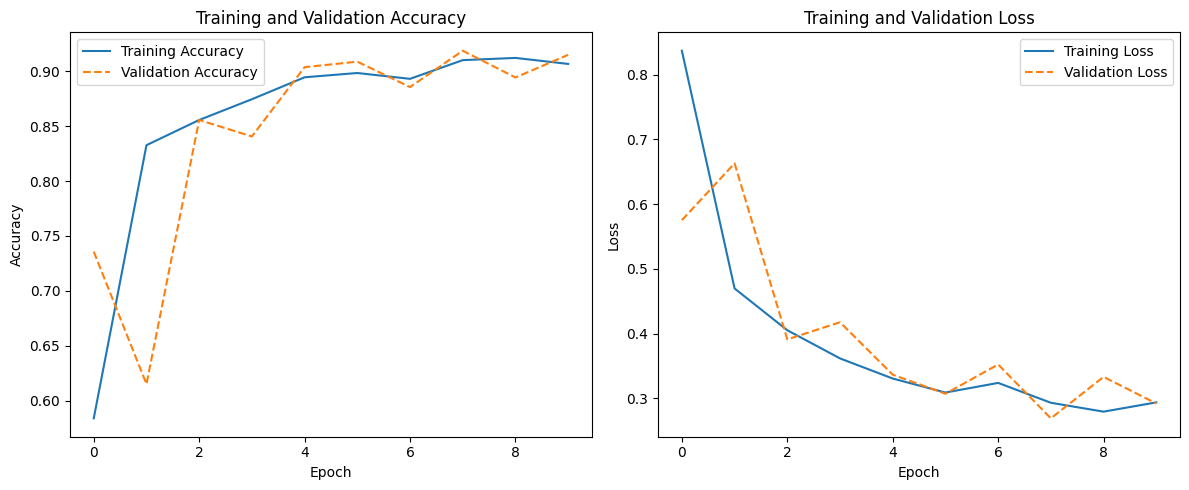

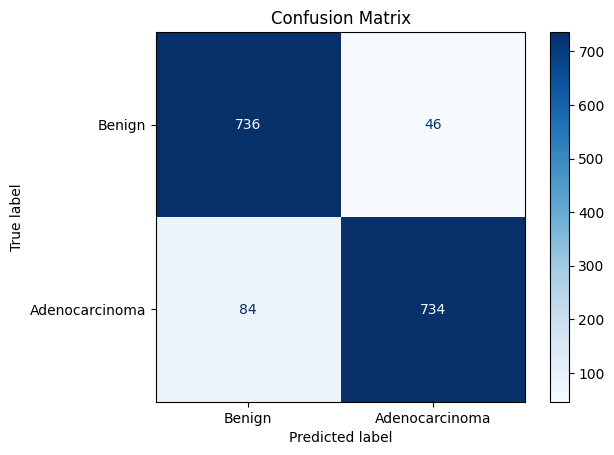

Fold 5/5


C:\Users\Rahat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 58s 281ms/step - accuracy: 0.5554 - loss: 0.9112 - val_accuracy: 0.8819 - val_loss: 0.4614
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 281ms/step - accuracy: 0.8298 - loss: 0.4518 - val_accuracy: 0.9056 - val_loss: 0.3319
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 280ms/step - accuracy: 0.8834 - loss: 0.3483 - val_accuracy: 0.9013 - val_loss: 0.3197
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 280ms/step - accuracy: 0.8779 - loss: 0.3531 - val_accuracy: 0.9050 - val_loss: 0.2987
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 279ms/step - accuracy: 0.9046 - loss: 0.3010 - val_accuracy: 0.9050 - val_loss: 0.3311
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 56s 279ms/step - accuracy: 0.9069 - loss: 0.2967 - val_accuracy: 0.9269 - val_loss: 0.2786
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 58s 291ms/step - accuracy: 0.8997 - loss: 0.3086 - val_accuracy: 0.7500 - val_loss: 0.5516
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 61s 307ms/step - accuracy: 0.9028 - loss: 0

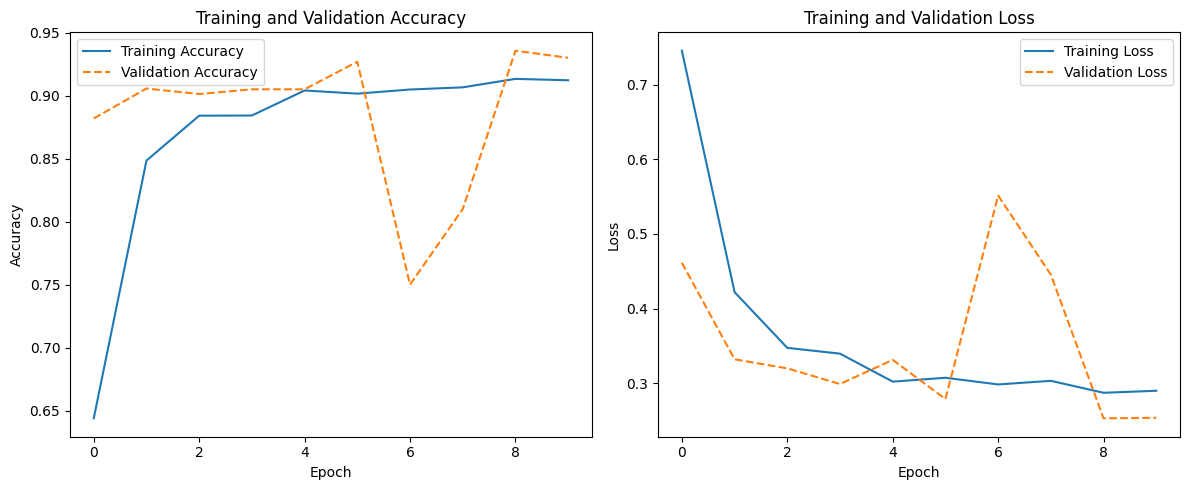

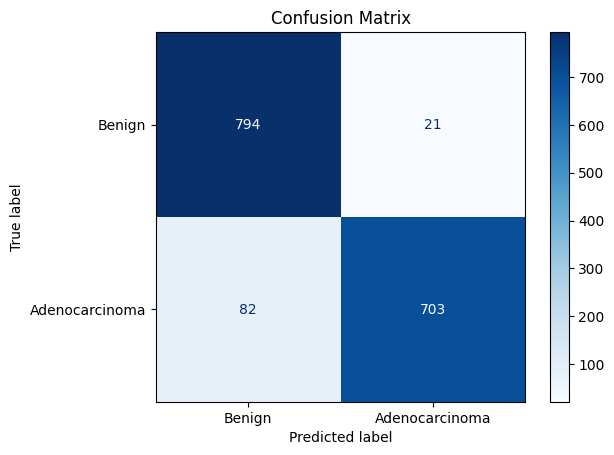

Filters shape: (3, 3, 1, 32)


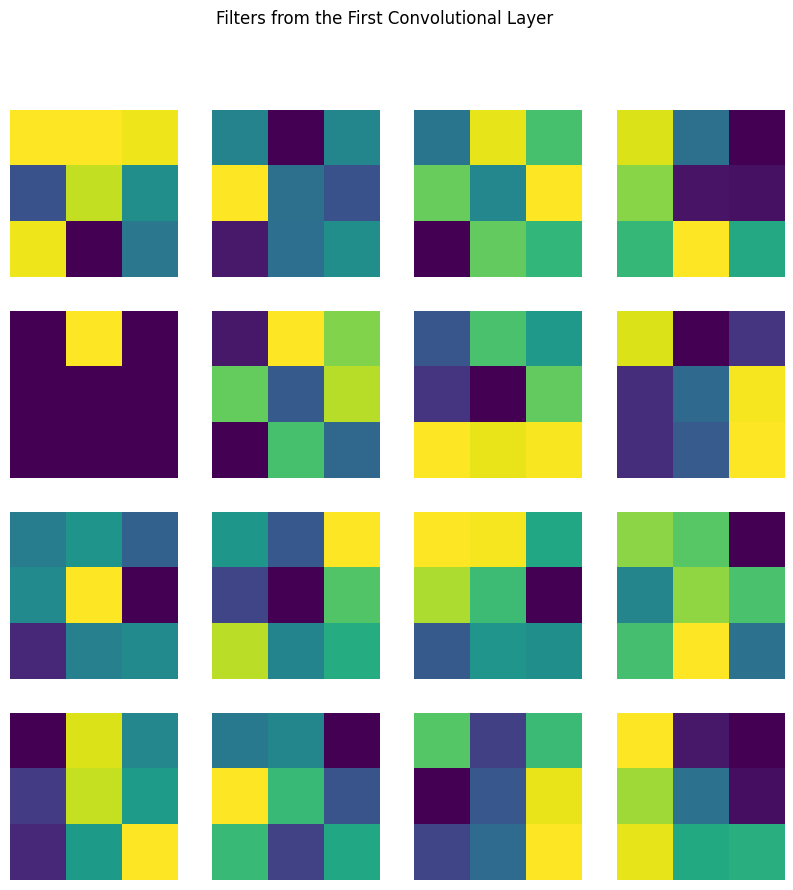

Mean Accuracy across 5 folds: 0.9255
Mean F1 Score across 5 folds: 0.9224


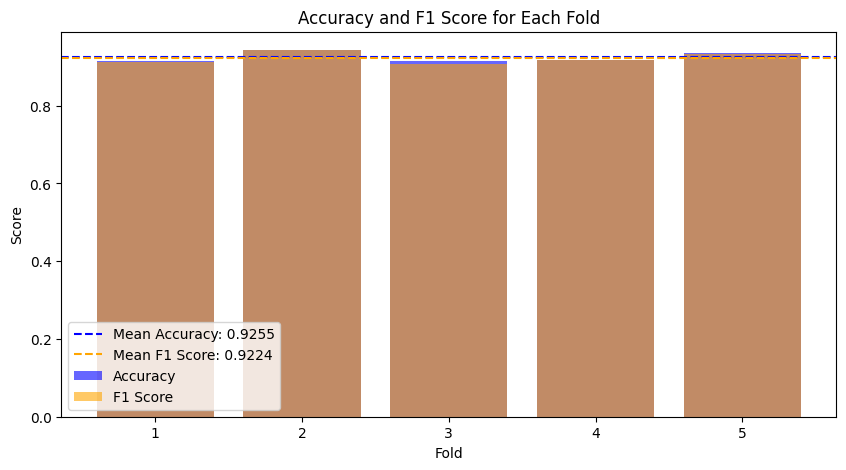

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from tensorflow.keras import layers, models, regularizers

# Function to plot training and validation accuracy/loss curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Function to visualize filters from the first convolutional layer
def visualize_filters(model):
    first_layer = model.layers[0]  # First convolutional layer
    filters, biases = first_layer.get_weights()
    print(f"Filters shape: {filters.shape}")

    plt.figure(figsize=(10, 10))
    for i in range(min(16, filters.shape[-1])):  # Display first 16 filters
        plt.subplot(4, 4, i + 1)
        plt.imshow(filters[:, :, 0, i], cmap='viridis')  # Display the filter
        plt.axis('off')
    plt.suptitle('Filters from the First Convolutional Layer')
    plt.show()


# Define the input shape
input_shape = (128, 128, 1)

# Initialize k-fold cross-validation
k = 5  # Number of folds
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store accuracy and F1 scores for each fold
accuracies = []
f1_scores = []

# Lists to store training history for each fold
all_history = []

# Perform k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
    print(f"Fold {fold + 1}/{k}")

    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Create the CNN model for this fold
    model = create_cnn_model(input_shape)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Early Stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=5,          # Stop after 5 epochs without improvement
        restore_best_weights=True  # Restore the best model weights
    )

    # Train the model
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=10,  # Maximum number of epochs
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping],  # Add early stopping
        verbose=1  # Show progress
    )

    # Store the training history for this fold
    all_history.append(history)

    # Evaluate the model on the validation set
    y_pred_prob = model.predict(X_val_fold)
    y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_val_fold, y_pred)
    f1 = f1_score(y_val_fold, y_pred)

    # Store the scores
    accuracies.append(accuracy)
    f1_scores.append(f1)

    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

    # Plot training and validation curves for this fold
    plot_training_curves(history)

    # Plot confusion matrix for this fold
    plot_confusion_matrix(y_val_fold, y_pred, class_names=['Benign', 'Adenocarcinoma'])

    # Visualize filters from the first convolutional layer for the last fold
    if fold == k - 1:  # Only for the last fold
        visualize_filters(model)

# Calculate the mean accuracy and F1 score across all folds
mean_accuracy = np.mean(accuracies)
mean_f1_score = np.mean(f1_scores)

print(f"Mean Accuracy across {k} folds: {mean_accuracy:.4f}")
print(f"Mean F1 Score across {k} folds: {mean_f1_score:.4f}")

# Plot accuracy and F1 score for each fold
plt.figure(figsize=(10, 5))
plt.bar(range(1, k + 1), accuracies, color='blue', alpha=0.6, label='Accuracy')
plt.bar(range(1, k + 1), f1_scores, color='orange', alpha=0.6, label='F1 Score')
plt.axhline(mean_accuracy, color='blue', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')
plt.axhline(mean_f1_score, color='orange', linestyle='--', label=f'Mean F1 Score: {mean_f1_score:.4f}')
plt.title('Accuracy and F1 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.show()

# Building ScatNEt Model

Implementing ScatNet

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from kymatio.tensorflow import Scattering2D

#  ScatNet model
def create_scatnet_model(input_shape, classifier):
    # Scattering transform layer
    scattering = Scattering2D(J=2, shape=input_shape[:2])  # J=2 for 2 scales, adjust as needed

    # Define the model
    model = models.Sequential([
        # Reshape input to remove batch and channel dimensions
        layers.Lambda(lambda x: tf.squeeze(x, axis=-1)),  # Remove channel dimension
        layers.Lambda(lambda x: scattering(x)),  # Apply scattering transform
        layers.Flatten(),
        classifier
    ])
    return model

# Define the input shape
input_shape = (128, 128, 1)

# same Classifier as  the CNN)
classifier = models.Sequential([
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Create model
scatnet_model = create_scatnet_model(input_shape, classifier)

# build  model by passing a sample input
sample_input = np.random.rand(1, *input_shape)  # Batch of 1 sample
_ = scatnet_model(sample_input)

# Compile  model
scatnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# model summary
scatnet_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (1, 128, 128)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (1, 81, 32, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (1, 82944)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (1, 1)                      │      10,617,089 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,617,089 (40.50 MB)

 Trainable params: 10,617,089 (40.50 MB)

 Non-trainable params: 0 (0.00 B)

# Implimenting K Fold Validation

Performing K Fold Validation With Graph Visialization For ScatNet: 5 Fold 10 Epoch

Fold 1/5
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 139s 616ms/step - accuracy: 0.6634 - loss: 0.6519 - val_accuracy: 0.7294 - val_loss: 0.6144
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 116s 579ms/step - accuracy: 0.6661 - loss: 0.6453 - val_accuracy: 0.7581 - val_loss: 0.5978
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 115s 577ms/step - accuracy: 0.6283 - loss: 0.6519 - val_accuracy: 0.7513 - val_loss: 0.6133
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 112s 560ms/step - accuracy: 0.6781 - loss: 0.6245 - val_accuracy: 0.6994 - val_loss: 0.6146
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 109s 544ms/step - accuracy: 0.6571 - loss: 0.6423 - val_accuracy: 0.7606 - val_loss: 0.5774
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 112s 559ms/step - accuracy: 0.6449 - loss: 0.6366 - val_accuracy: 0.7850 - val_loss: 0.6202
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 114s 571ms/step - accuracy: 0.6695 - loss: 0.6231 - val_accuracy: 0.6594 - val_loss: 0.6701
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 111s 553ms/step - accuracy:

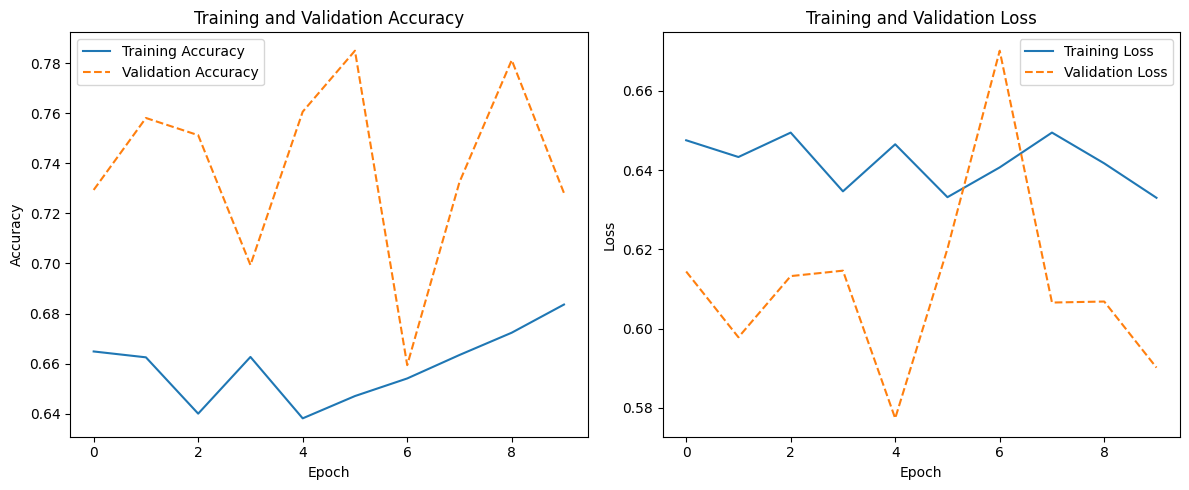

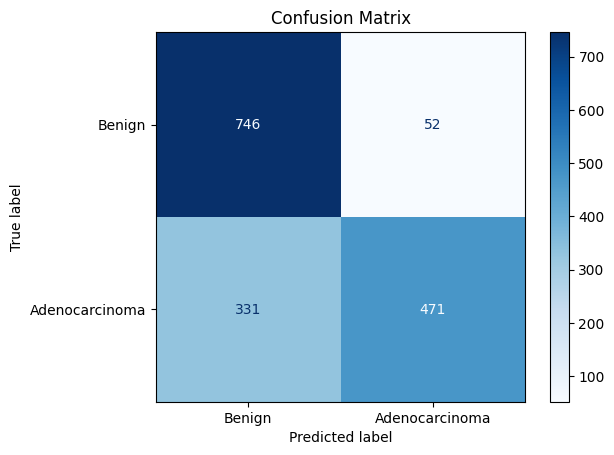

Fold 2/5
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 133s 590ms/step - accuracy: 0.6759 - loss: 0.6341 - val_accuracy: 0.7394 - val_loss: 0.5764
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 112s 558ms/step - accuracy: 0.6484 - loss: 0.6347 - val_accuracy: 0.7431 - val_loss: 0.6305
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 540ms/step - accuracy: 0.6711 - loss: 0.6520 - val_accuracy: 0.7644 - val_loss: 0.6182
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 109s 543ms/step - accuracy: 0.6578 - loss: 0.6451 - val_accuracy: 0.7281 - val_loss: 0.5989
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 109s 545ms/step - accuracy: 0.6374 - loss: 0.6700 - val_accuracy: 0.7456 - val_loss: 0.6297
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 541ms/step - accuracy: 0.6918 - loss: 0.6329 - val_accuracy: 0.7450 - val_loss: 0.6076
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 347ms/step
Fold 2 - Accuracy: 0.7394, F1 Score: 0.6814


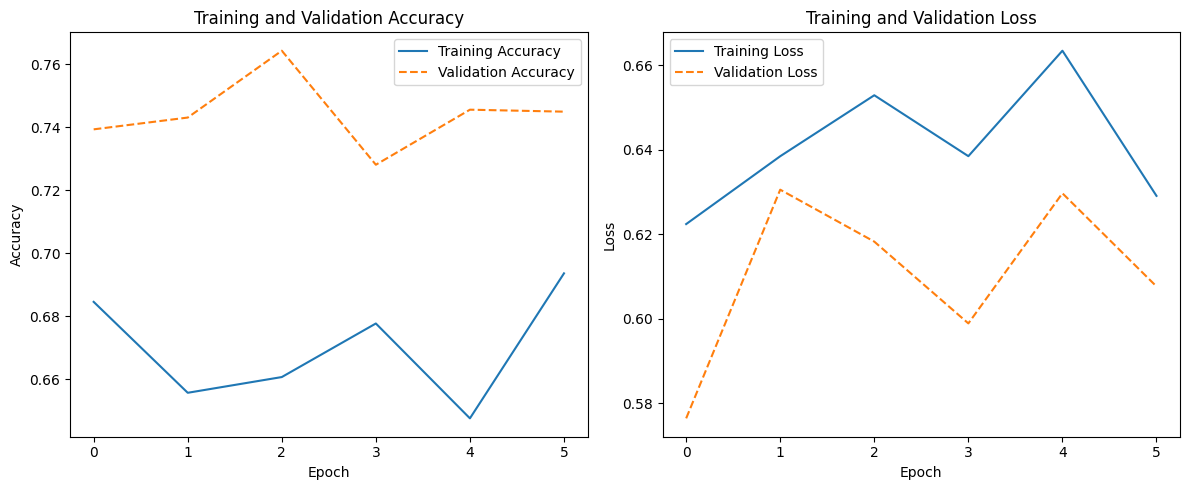

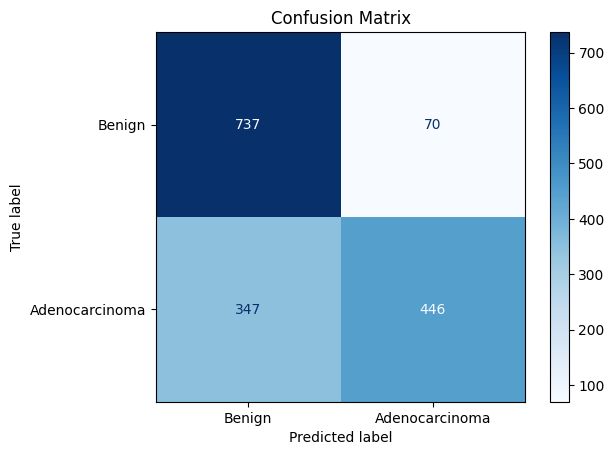

Fold 3/5
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 132s 587ms/step - accuracy: 0.6782 - loss: 0.6239 - val_accuracy: 0.7588 - val_loss: 0.5724
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 112s 563ms/step - accuracy: 0.6899 - loss: 0.6185 - val_accuracy: 0.7625 - val_loss: 0.5586
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 113s 565ms/step - accuracy: 0.6955 - loss: 0.6108 - val_accuracy: 0.7563 - val_loss: 0.5706
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 113s 565ms/step - accuracy: 0.6639 - loss: 0.6208 - val_accuracy: 0.7538 - val_loss: 0.5589
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 113s 563ms/step - accuracy: 0.6909 - loss: 0.6094 - val_accuracy: 0.7588 - val_loss: 0.5633
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 113s 564ms/step - accuracy: 0.6897 - loss: 0.6119 - val_accuracy: 0.7231 - val_loss: 0.5631
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 113s 563ms/step - accuracy: 0.6832 - loss: 0.6266 - val_accuracy: 0.7219 - val_loss: 0.5713
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 346ms/step
Fold 3 - Accuracy: 0.7625

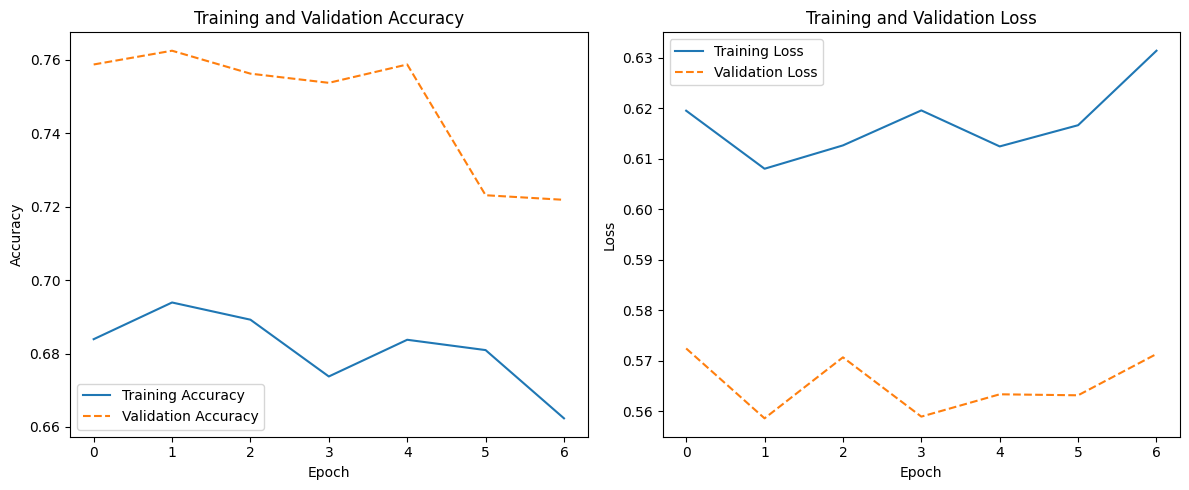

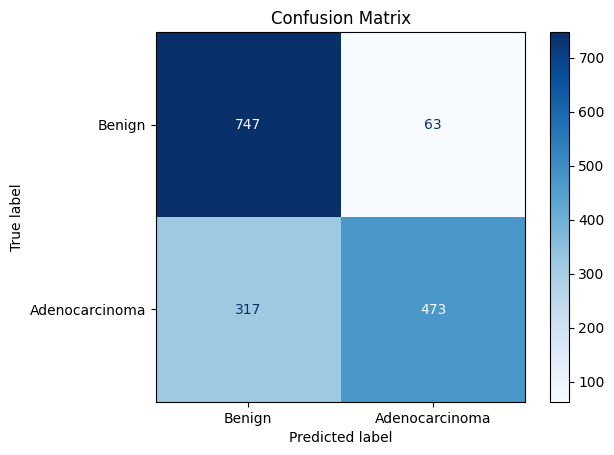

Fold 4/5
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 129s 568ms/step - accuracy: 0.6715 - loss: 0.6370 - val_accuracy: 0.7569 - val_loss: 0.6345
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 540ms/step - accuracy: 0.6903 - loss: 0.6327 - val_accuracy: 0.7600 - val_loss: 0.5465
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 539ms/step - accuracy: 0.6916 - loss: 0.5983 - val_accuracy: 0.7475 - val_loss: 0.5542
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 541ms/step - accuracy: 0.7004 - loss: 0.6018 - val_accuracy: 0.7325 - val_loss: 0.5709
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 539ms/step - accuracy: 0.6929 - loss: 0.6095 - val_accuracy: 0.7469 - val_loss: 0.5406
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 540ms/step - accuracy: 0.6841 - loss: 0.6200 - val_accuracy: 0.7475 - val_loss: 0.6249
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 540ms/step - accuracy: 0.6731 - loss: 0.6484 - val_accuracy: 0.7606 - val_loss: 0.6136
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 539ms/step - accuracy:

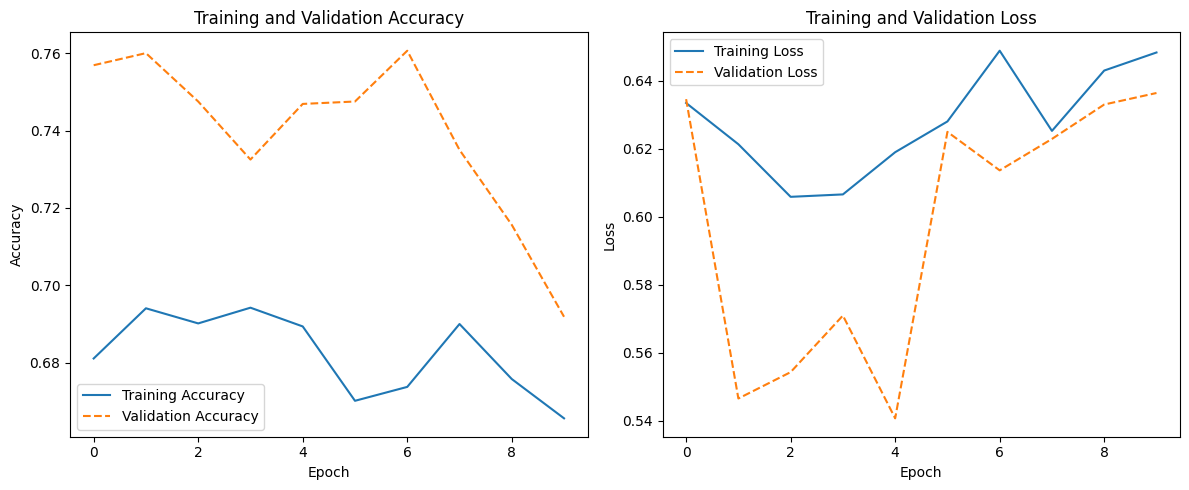

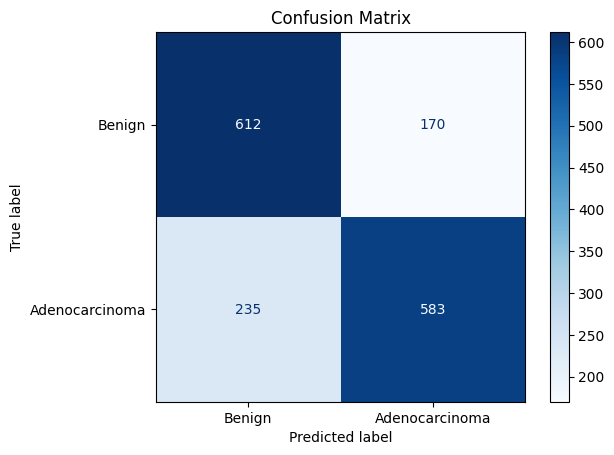

Fold 5/5
Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 129s 569ms/step - accuracy: 0.6900 - loss: 0.6076 - val_accuracy: 0.7725 - val_loss: 0.5832
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 540ms/step - accuracy: 0.7263 - loss: 0.5893 - val_accuracy: 0.7750 - val_loss: 0.6156
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 540ms/step - accuracy: 0.6797 - loss: 0.6495 - val_accuracy: 0.7394 - val_loss: 0.6013
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 542ms/step - accuracy: 0.6412 - loss: 0.6588 - val_accuracy: 0.7719 - val_loss: 0.5966
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 542ms/step - accuracy: 0.6624 - loss: 0.6455 - val_accuracy: 0.7731 - val_loss: 0.6040
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 108s 541ms/step - accuracy: 0.6824 - loss: 0.6371 - val_accuracy: 0.7837 - val_loss: 0.5897
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 356ms/step
Fold 5 - Accuracy: 0.7725, F1 Score: 0.7719


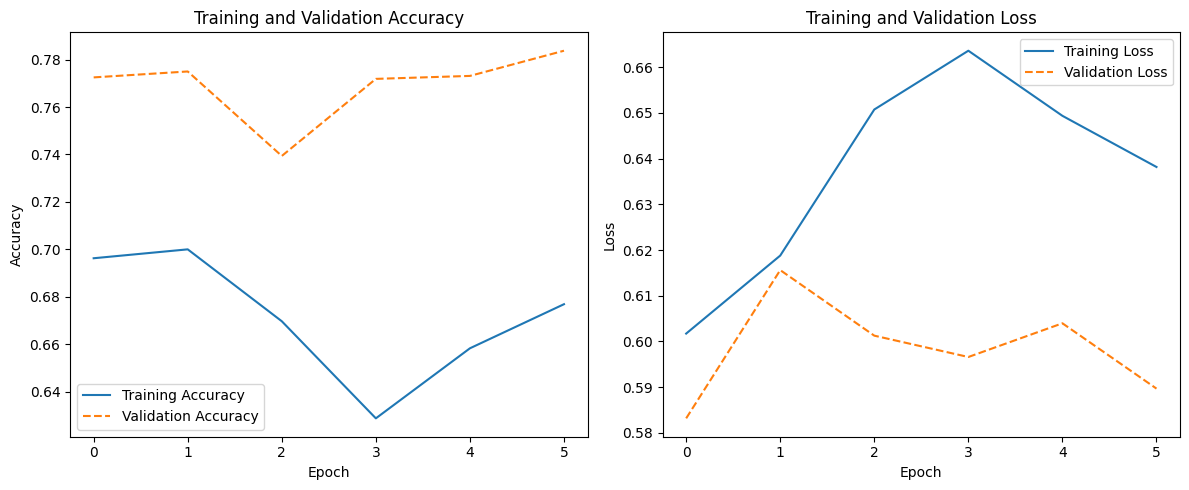

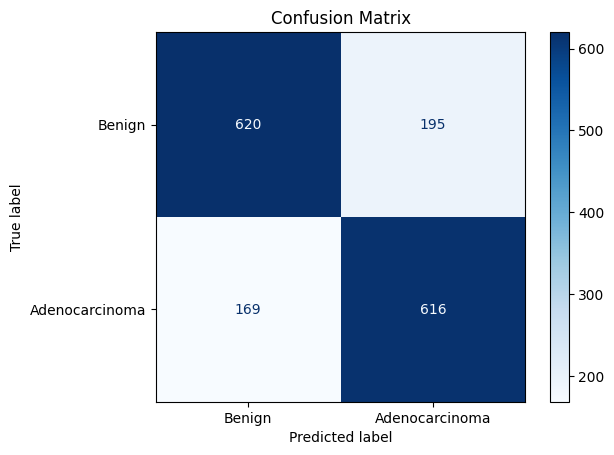

Mean Accuracy across 5 folds: 0.7564
Mean F1 Score across 5 folds: 0.7240


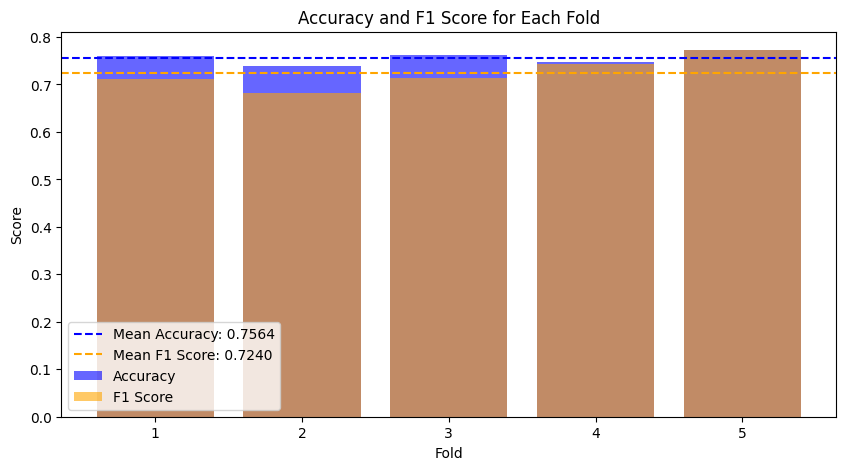

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from kymatio.tensorflow import Scattering2D

# Function to plot training and validation accuracy/loss curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    # Plot training and validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

#  k-fold cross-validation
k = 5  # Number of folds
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

#  store accuracy and F1 scores for each fold
accuracies = []
f1_scores = []

# Lists to store training history for each fold
all_history = []

# Perform k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
    print(f"Fold {fold + 1}/{k}")

    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # ScatNet model for this fold
    model = create_scatnet_model(input_shape, classifier)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Early Stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',  # Monitor validation loss
        patience=5,          # Stop after 5 epochs without improvement
        restore_best_weights=True  # Restore the best model weights
    )

    # Train the model
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=10,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping],  # Add early stopping
        verbose=1
    )

    # Store the training history for this fold
    all_history.append(history)

    # Evaluate the model on the validation set
    y_pred_prob = model.predict(X_val_fold)
    y_pred = (y_pred_prob > 0.5).astype(int)  # Convert p

    # accuracy and F1 score
    accuracy = accuracy_score(y_val_fold, y_pred)
    f1 = f1_score(y_val_fold, y_pred)

    # Store the scores
    accuracies.append(accuracy)
    f1_scores.append(f1)

    print(f"Fold {fold + 1} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")

    # training and validation curves for this fold
    plot_training_curves(history)

    # confusion matrix for this fold
    plot_confusion_matrix(y_val_fold, y_pred, class_names=['Benign', 'Adenocarcinoma'])

# mean accuracy and F1 score all folds
mean_accuracy = np.mean(accuracies)
mean_f1_score = np.mean(f1_scores)

print(f"Mean Accuracy across {k} folds: {mean_accuracy:.4f}")
print(f"Mean F1 Score across {k} folds: {mean_f1_score:.4f}")

# Plot accuracy and F1 score for each fold
plt.figure(figsize=(10, 5))
plt.bar(range(1, k + 1), accuracies, color='blue', alpha=0.6, label='Accuracy')
plt.bar(range(1, k + 1), f1_scores, color='orange', alpha=0.6, label='F1 Score')
plt.axhline(mean_accuracy, color='blue', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.4f}')
plt.axhline(mean_f1_score, color='orange', linestyle='--', label=f'Mean F1 Score: {mean_f1_score:.4f}')
plt.title('Accuracy and F1 Score for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.legend()
plt.show()

# Filter Extraction From ScatNet

Extracting Filters From ScatNet

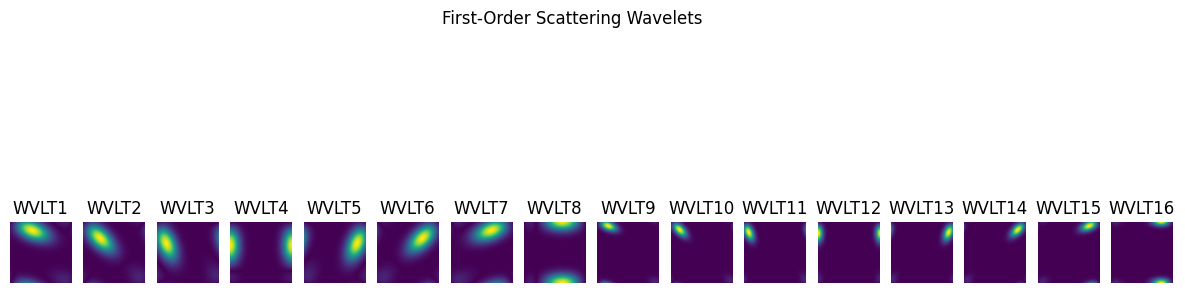

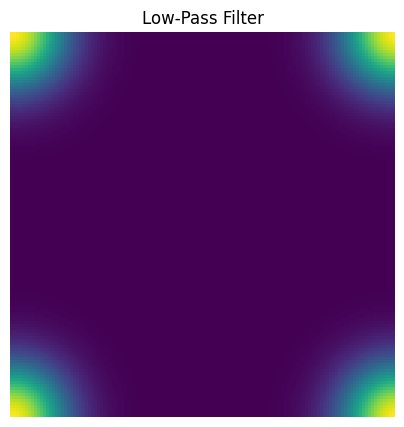

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from kymatio.scattering2d.filter_bank import filter_bank

# Define scattering parameters
J = 2  # Number of scales
shape = (128, 128)  # Input shape
L = 8  # Number of orientations per scale

# Generate the filter bank
filters = filter_bank(M=shape[0], N=shape[1], J=J, L=L)

# Extract first-order wavelet filters
first_order_wavelets = [wavelet['levels'][0] for wavelet in filters['psi']]

# Plot the first-order wavelet filters
fig, axes = plt.subplots(1, len(first_order_wavelets), figsize=(15, 5))
for i, wavelet in enumerate(first_order_wavelets):
    ax = axes[i]
    ax.imshow(np.abs(wavelet), cmap='viridis')
    ax.set_title(f'WVLT{i+1}')
    ax.axis('off')

plt.suptitle('First-Order Scattering Wavelets')
plt.show()

# Extract the low-pass filter
low_pass_filter = filters['phi']['levels'][0]

# Plot the low-pass filter
plt.figure(figsize=(5, 5))
plt.imshow(np.abs(low_pass_filter), cmap='viridis')
plt.title('Low-Pass Filter')
plt.axis('off')
plt.show()


# Filter Extraction From CNN 1st Layer

Extracting Filters From CNN 1st convoulutuon Layer

Filters shape: (3, 3, 1, 32)


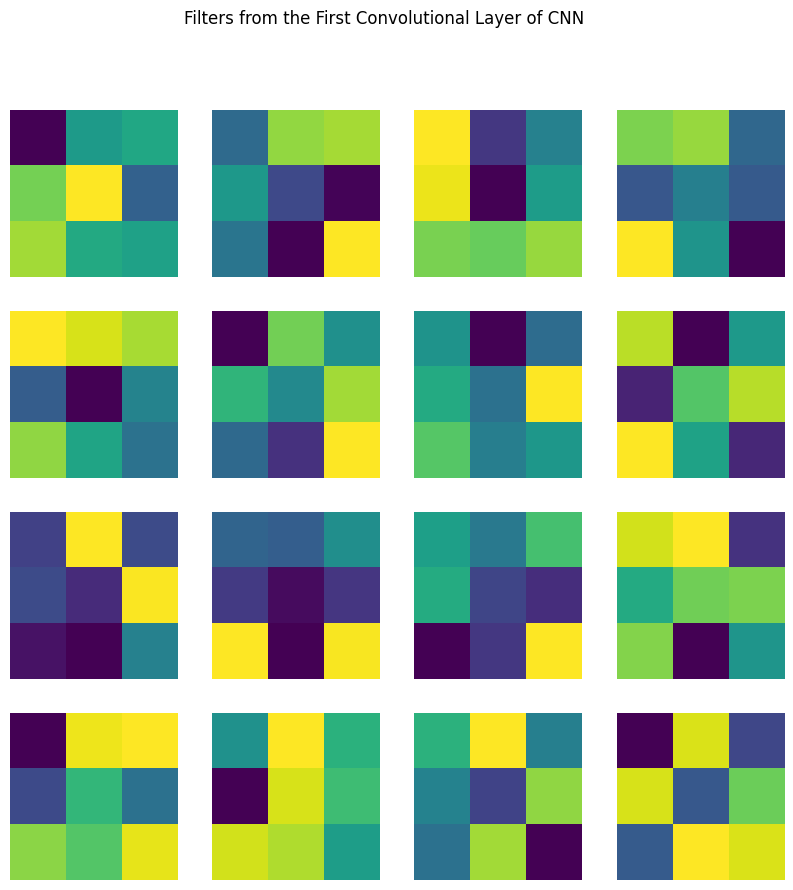

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def extract_cnn_filters(model):
    first_layer = model.layers[0]  # First convolutional layer
    filters, biases = first_layer.get_weights()
    print(f"Filters shape: {filters.shape}")

    # Plot the first 16 filters
    plt.figure(figsize=(10, 10))
    for i in range(min(16, filters.shape[-1])):  # Display first 16 filters
        plt.subplot(4, 4, i + 1)
        plt.imshow(filters[:, :, 0, i], cmap='viridis')  # Display the filter
        plt.axis('off')
    plt.suptitle('Filters from the First Convolutional Layer of CNN')
    plt.show()

# Extract and visualize filters from CNN
extract_cnn_filters(cnn_model)


# Extracted Filter Comparison

Extracted Filter Comparisn

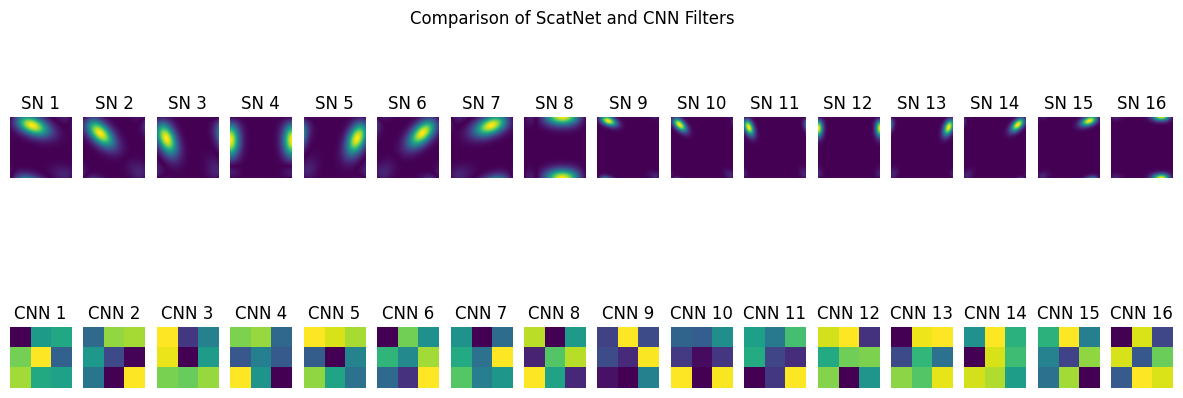

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def compare_filters(scatnet_filters, cnn_filters):
    num_filters = min(len(scatnet_filters), cnn_filters.shape[-1])

    fig, axes = plt.subplots(2, num_filters, figsize=(15, 5))

    for i in range(num_filters):
        # Ensure ScatNet filters are in the correct format
        scat_filter = np.abs(scatnet_filters[i]) if scatnet_filters[i].ndim == 2 else np.abs(scatnet_filters[i][0])
        cnn_filter = cnn_filters[:, :, 0, i]  # Extract the first channel of the CNN filter

        # ScatNet Filters
        axes[0, i].imshow(scat_filter, cmap='viridis')
        axes[0, i].set_title(f'SN {i+1}')
        axes[0, i].axis('off')

        # CNN Filters
        axes[1, i].imshow(cnn_filter, cmap='viridis')
        axes[1, i].set_title(f'CNN {i+1}')
        axes[1, i].axis('off')

    axes[0, 0].set_ylabel('SN', fontsize=10)
    axes[1, 0].set_ylabel('CNN', fontsize=10)

    plt.suptitle('Comparison of ScatNet and CNN Filters')
    plt.show()

# Extract CNN filters properly
first_conv_layer = cnn_model.layers[0]
cnn_filters, _ = first_conv_layer.get_weights()

# Compare filters
compare_filters(first_order_wavelets, cnn_filters)


# Deep LIFT SHAP and Occlution For ScatNet - Captum Library

Implimenting Deep LIFT Shap and Occulation Using Captum Library : For ScatNet

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import DeepLift, Occlusion
from kymatio.torch import Scattering2D

# ScatNet Model in PyTorch
class ScatNetTorch(nn.Module):
    def __init__(self, input_shape):
        super(ScatNetTorch, self).__init__()
        self.scattering = Scattering2D(J=2, shape=(input_shape[1], input_shape[2]))

        # output shape
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # Shape: (1, 1, 128, 128)
            scatter_out = self.scattering(dummy_input)  # Apply scattering
            self.feature_size = scatter_out.numel() // scatter_out.shape[0]  # Flatten size per sample

        # classifier
        self.classifier = nn.Sequential(
            nn.Linear(self.feature_size, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.scattering(x)  # Apply Scattering Transform
        x = x.view(x.shape[0], -1)  # Flatten for classifier
        return self.classifier(x)

# Instantiate ScatNet Model
input_shape = (1, 128, 128)
scatnet_torch_model = ScatNetTorch(input_shape)
scatnet_torch_model.eval()


ScatNetTorch(
  (scattering): Scattering2D()
  (classifier): Sequential(
    (0): Linear(in_features=82944, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=1, bias=True)
    (4): Sigmoid()
  )
)

In [ ]:
#  TensorFlow data to PyTorch tensor
def tf_to_torch(tensor):
    return torch.tensor(tensor).permute(0, 3, 1, 2).float()

#  test sample
input_tensor = X_test[:1]  # Select first test image
input_tensor_torch = tf_to_torch(input_tensor)
input_tensor_torch.requires_grad_()

# Create a baseline
reference_input = np.zeros((1, 128, 128, 1), dtype=np.float32)
reference_input_torch = tf_to_torch(reference_input)


In [ ]:
# Apply DeepLIFT
deep_lift = DeepLift(scatnet_torch_model)
deep_lift_attr_C = deep_lift.attribute(input_tensor_torch, reference_input_torch).squeeze().detach().numpy()

# Apply Occlusion
occlusion = Occlusion(scatnet_torch_model)
occlusion_attr_C = occlusion.attribute(input_tensor_torch, strides=(1, 10, 10), sliding_window_shapes=(1, 10, 10)).squeeze().detach().numpy()


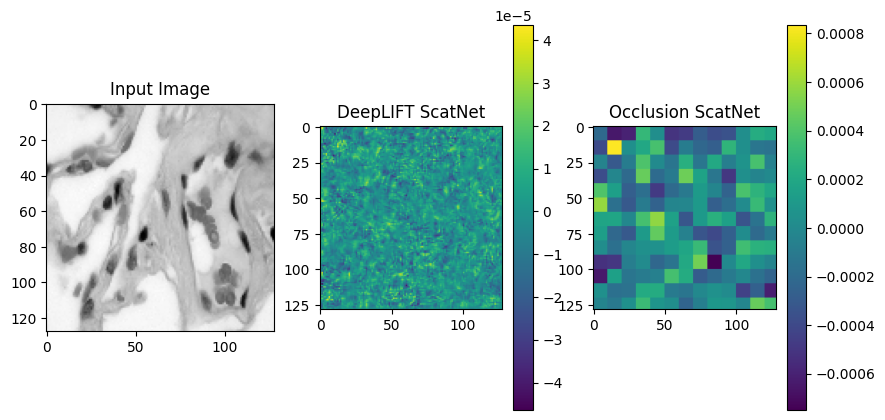

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(input_tensor[0, :, :, 0], cmap='gray')
plt.subplot(1, 3, 2)
plt.title("DeepLIFT ScatNet")
plt.imshow(deep_lift_attr_C.reshape(128, 128), cmap='viridis')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("Occlusion ScatNet")
plt.imshow(occlusion_attr_C.reshape(128, 128), cmap='viridis')
plt.colorbar()
plt.show()


# Deep LIFT SHAP and Occlution For CNN - Captum Library

Implimenting Deep LIFT Shap and Occulation Using Captum Library : For CNN

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from captum.attr import DeepLift, Occlusion

# CNN Model in PyTorch
class CNNModel(nn.Module):
    def __init__(self, input_shape):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=input_shape[0], out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

        # Compute flatten size
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)
            out = self.pool(self.conv1(dummy_input))
            out = self.pool(self.conv2(out))
            out = self.pool(self.conv3(out))
            self.flatten_size = out.numel()

        self.fc1 = nn.Linear(self.flatten_size, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.dropout1(x)

        x = x.contiguous().view(x.shape[0], -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc2(x))
        return x

# Instantiate CNN Model
input_shape = (1, 128, 128)
cnn_torch_model = CNNModel(input_shape)
cnn_torch_model.eval()


CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
# Convert TensorFlow data to PyTorch tensor
def tf_to_torch(tensor):
    return torch.tensor(tensor).permute(0, 3, 1, 2).float()

# test sample
input_tensor = X_test[:1]  # Select first test image
input_tensor_torch = tf_to_torch(input_tensor)
input_tensor_torch.requires_grad_()  # Enable gradients for DeepLIFT

# Create a baseline
reference_input = np.zeros((1, 128, 128, 1), dtype=np.float32)
reference_input_torch = tf_to_torch(reference_input)


In [ ]:
# Apply DeepLIFT
deep_lift = DeepLift(cnn_torch_model)
deep_lift_attr_C1 = deep_lift.attribute(input_tensor_torch, reference_input_torch).squeeze().detach().numpy()

# Apply Occlusion
occlusion = Occlusion(cnn_torch_model)
occlusion_attr_C1 = occlusion.attribute(input_tensor_torch, strides=(1, 10, 10), sliding_window_shapes=(1, 10, 10)).squeeze().detach().numpy()


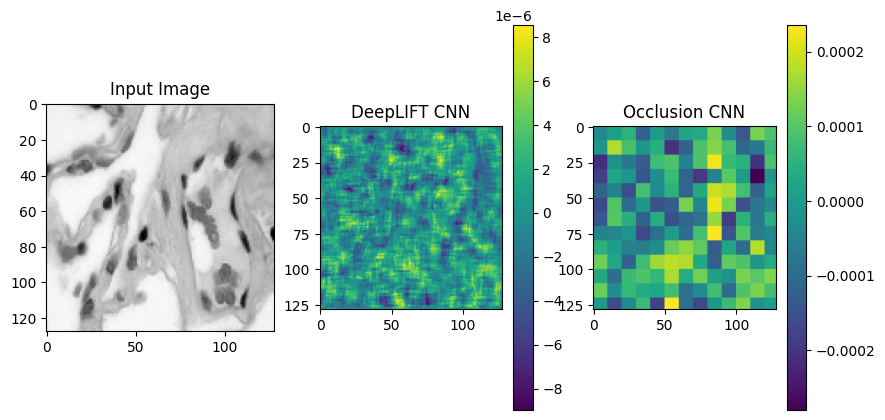

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(input_tensor[0, :, :, 0], cmap='gray')
plt.subplot(1, 3, 2)
plt.title("DeepLIFT CNN")
plt.imshow(deep_lift_attr_C1.reshape(128, 128), cmap='viridis')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("Occlusion CNN")
plt.imshow(occlusion_attr_C1.reshape(128, 128), cmap='viridis')
plt.colorbar()
plt.show()


# Deep LIFT SHAP  For CNN and ScatNet - Hard Coded



Deep LIFT SHAP Implementation for CNN and ScatNet without captum Library

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from kymatio.torch import Scattering2D

# Previous CNN Model
class CNNModel(nn.Module):
    def __init__(self, input_shape):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=input_shape[0], out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)

        #  MaxPool2d used with AvgPool2d for DeepLIFT compatibility
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)

        # Compute flatten size
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # Shape: (C, H, W)
            out = self.pool(self.conv1(dummy_input))
            out = self.pool(self.conv2(out))
            out = self.pool(self.conv3(out))
            self.flatten_size = out.numel()

        self.fc1 = nn.Linear(self.flatten_size, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = self.pool(torch.relu(self.conv3(x)))
        x = self.dropout1(x)

        x = x.contiguous().view(x.shape[0], -1)
        x = torch.relu(self.fc1(x))
        x = self.dropout2(x)
        x = torch.sigmoid(self.fc2(x))
        return x

# Instantiate CNN Model
input_shape = (1, 128, 128)
cnn_torch_model = CNNModel(input_shape)
cnn_torch_model.eval()


CNNModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)

In [ ]:
# Previous ScatNet Model
class ScatNetTorch(nn.Module):
    def __init__(self, input_shape):
        super(ScatNetTorch, self).__init__()
        self.scattering = Scattering2D(J=2, shape=(input_shape[1], input_shape[2]))

        # Compute output shape
        with torch.no_grad():
            dummy_input = torch.zeros(1, *input_shape)  # (1, 1, 128, 128)
            scatter_out = self.scattering(dummy_input)
            self.feature_size = scatter_out.numel() // scatter_out.shape[0]  # Flattened feature size

        self.classifier = nn.Sequential(
            nn.Linear(self.feature_size, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.scattering(x)
        x = x.view(x.shape[0], -1)
        return self.classifier(x)

#  Instantiate ScatNet Model
scatnet_torch_model = ScatNetTorch(input_shape)
scatnet_torch_model.eval()


ScatNetTorch(
  (scattering): Scattering2D()
  (classifier): Sequential(
    (0): Linear(in_features=82944, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=1, bias=True)
    (4): Sigmoid()
  )
)

In [ ]:
def compute_deeplift_shap(model, input_tensor, num_baselines=10):

    model.zero_grad()
    input_tensor.requires_grad_()  # Enable gradient tracking

    # Use Zero Baseline
    baselines = [torch.zeros_like(input_tensor) for _ in range(num_baselines)]
    baselines = torch.stack(baselines)

    attributions = []

    for baseline in baselines:
        # Forward pass
        output = model(input_tensor)
        baseline_output = model(baseline)

        # Compute gradient w.r.t input
        output.backward(torch.ones_like(output), retain_graph=True)
        gradients = input_tensor.grad.data  # Get gradients

        # Compute difference between input and baseline
        contribution = (input_tensor - baseline) * gradients
        attributions.append(contribution.detach().cpu().numpy())

        # Reset gradients for next iteration
        model.zero_grad()
        input_tensor.grad = None

    # Average attributions over baselines
    return np.mean(attributions, axis=0)

# Convert Test Image to PyTorch Format
def tf_to_torch(tensor):
    return torch.tensor(tensor).permute(0, 3, 1, 2).float()

input_tensor_torch = tf_to_torch(X_test[:1])

# Compute DeepLIFT SHAP for CNN
cnn_deeplift_shap_attr = compute_deeplift_shap(cnn_torch_model, input_tensor_torch)

# Compute DeepLIFT SHAP for ScatNet Model
scatnet_deeplift_shap_attr = compute_deeplift_shap(scatnet_torch_model, input_tensor_torch)


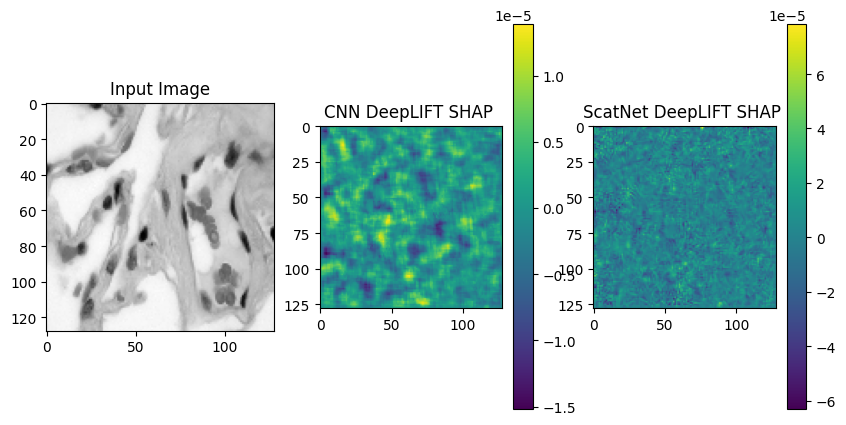

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(X_test[0, :, :, 0], cmap='gray')
plt.subplot(1, 3, 2)
plt.title("CNN DeepLIFT SHAP ")
plt.imshow(cnn_deeplift_shap_attr.squeeze(), cmap='viridis')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("ScatNet DeepLIFT SHAP ")
plt.imshow(scatnet_deeplift_shap_attr.squeeze(), cmap='viridis')
plt.colorbar()
plt.show()


# Occlusion For CNN and ScatNet - Hard Coded



Implimenting Occulution for Both Scatnet And CNN without Using Captum Library

In [ ]:
def compute_occlusion(model, input_tensor, patch_size=10, stride=10):
    input_tensor = input_tensor.clone()
    occlusion_map = torch.zeros_like(input_tensor, dtype=torch.float32)

    _, _, h, w = input_tensor.shape

    # Ensure occlusion applied within the size
    for i in range(0, h - patch_size + 1, stride):
        for j in range(0, w - patch_size + 1, stride):
            occluded_input = input_tensor.clone()
            occluded_input[:, :, i:i+patch_size, j:j+patch_size] = 0  # Mask the selected region

            occluded_input = occluded_input[:, :, :128, :128]

            # Forward pass
            original_output = model(input_tensor).detach().cpu().numpy().astype(np.float32)
            occluded_output = model(occluded_input).detach().cpu().numpy().astype(np.float32)

            # Compute difference in output
            importance = np.abs(original_output - occluded_output)
            importance_tensor = torch.tensor(importance, dtype=torch.float32)

            #  Assign importance while keeping shape
            occlusion_map[:, :, i:i+patch_size, j:j+patch_size] += importance_tensor

    return occlusion_map.squeeze().detach().cpu().numpy()


In [ ]:
# Convert Test Image to PyTorch Format
input_tensor_torch = tf_to_torch(X_test[:1])

# Compute Occlusion Attribution for CNN
cnn_occlusion_attr = compute_occlusion(cnn_torch_model, input_tensor_torch)

# Compute Occlusion Attribution for ScatNet
scatnet_occlusion_attr = compute_occlusion(scatnet_torch_model, input_tensor_torch)


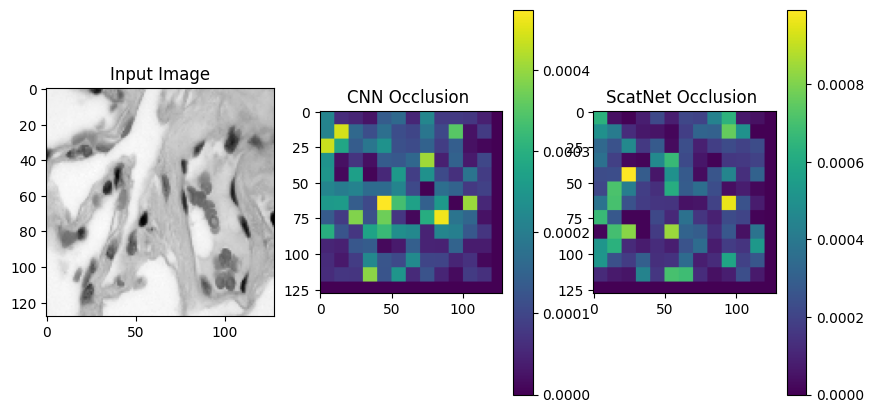

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Input Image")
plt.imshow(X_test[0, :, :, 0], cmap='gray')
plt.subplot(1, 3, 2)
plt.title("CNN Occlusion ")
plt.imshow(cnn_occlusion_attr, cmap='viridis')
plt.colorbar()
plt.subplot(1, 3, 3)
plt.title("ScatNet Occlusion ")
plt.imshow(scatnet_occlusion_attr, cmap='viridis')
plt.colorbar()
plt.show()


# Attribution Map Comparison

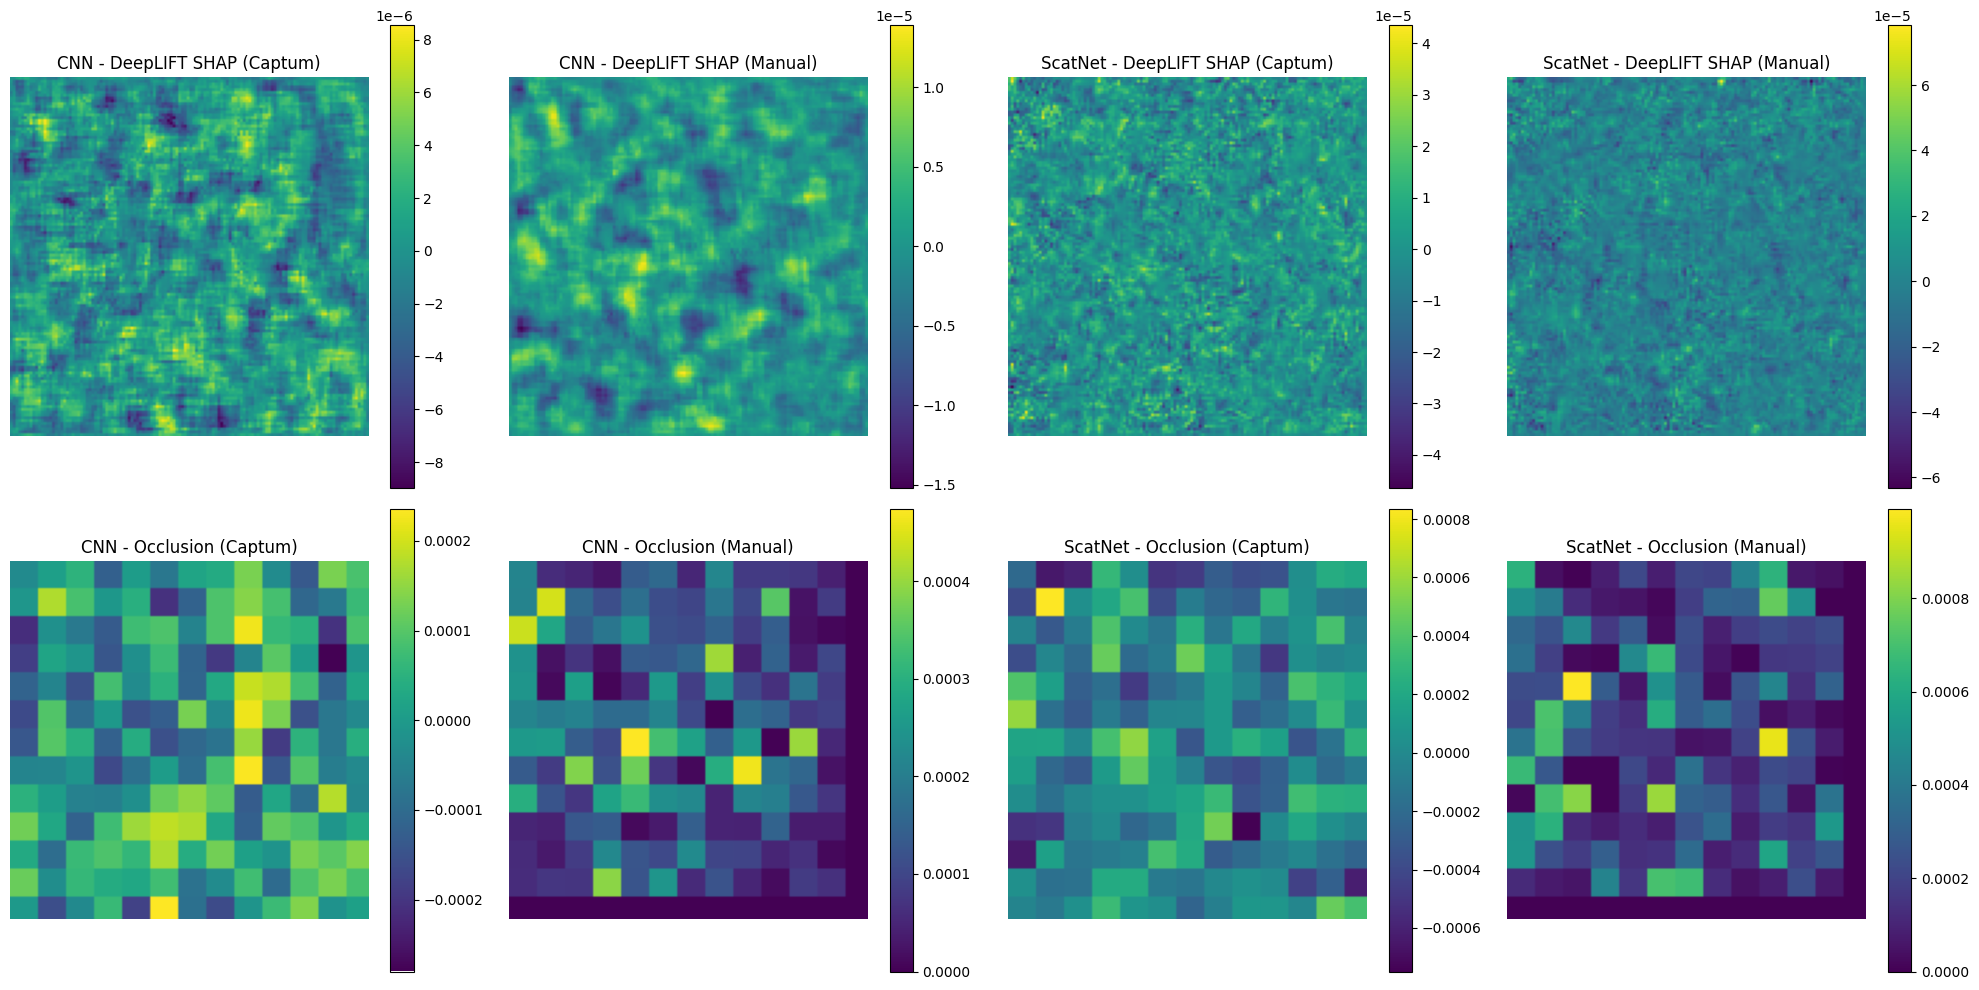

In [ ]:
import matplotlib.pyplot as plt

#  correct shape for Matplotlib
def preprocess_attr(attr):

    if len(attr.shape) == 4:  # Shape (1, 1, 128, 128)
        return attr.squeeze(0).squeeze(0)  #
    return attr

# Preprocess attributions to ensure correct shape for plotting
attributions = [
    preprocess_attr(deep_lift_attr_C1.reshape(128, 128)), preprocess_attr(cnn_deeplift_shap_attr.squeeze()),
    preprocess_attr(deep_lift_attr_C.reshape(128, 128)), preprocess_attr(scatnet_deeplift_shap_attr.squeeze()),
    occlusion_attr_C1.reshape(128, 128), cnn_occlusion_attr,  # Already correct shape
    occlusion_attr_C.reshape(128, 128), scatnet_occlusion_attr  # Already correct shape
]

# Titles for comparison
titles = [
    "CNN - DeepLIFT SHAP (Captum)", "CNN - DeepLIFT SHAP (Manual)",
    "ScatNet - DeepLIFT SHAP (Captum)", "ScatNet - DeepLIFT SHAP (Manual)",
    "CNN - Occlusion (Captum)", "CNN - Occlusion (Manual)",
    "ScatNet - Occlusion (Captum)", "ScatNet - Occlusion (Manual)"
]

# Set up figure for visualization
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Plot each graph
for i, ax in enumerate(axes.flat):
    img = ax.imshow(attributions[i], cmap='viridis')
    ax.set_title(titles[i])
    ax.axis("off")
    fig.colorbar(img, ax=ax)

plt.tight_layout()
plt.show()
